# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sommaire

* [Regression linéaire simple](#chapter1)
    * [Données](#section_1_1)
    * [Création de la droite d'équation](#section_1_2)
    * [Prédiction](#section_1_3)

* [Régression linéaire multiple](#chapter2)
    * [Données](#section_2_1)
    * [Data preprocessing](#section_2_2)
    * [Matrice de Correlation](#section_2_3)
    * [Concept d'entraînement du modèle](#section_2_5)
    * [Modèle prédictif saisonnier](#section_2_5)
    * [Modèle prédictif non saisonnier](#section_2_6)
    * [Prédiction du Nombre de PC vendus](#section_2_7)
    

Nous sommes mandatés par l'entreprise XYZ, qui vends des ordinateurs, cette dernière stock des données depuis 5 ans mais ne sait pas trop les exploiter. L'entreprise XYZ aimerait avoir une estimation de ses ventes de PC pour gérer le stock ainsi que staffer les équipes en conséquence. Nous allons voir ce que nous pourrions faire en tant que jeune Data Scientist

# Régression linéaire simple <a id="chapter1"></a>

Dans un premier temps, l'entreprise nous fournit simplement le nombre de ventes de PC sur les 5 ans. Nous allons essayer de faire une regression linéaire simple pour pouvoir essayer de prédire le nombre de ventes

In [3]:
df = pd.read_excel("Dataset/Data_computer_sells.xlsx")

In [4]:
df.head()

,Mois,Computers_number
0,1,1
1,2,4
2,3,5
3,4,7
4,5,6


## Données <a id="section_1_1"></a>

In [5]:
X = df.iloc[0:len(df),0]
Y = df.iloc[0:len(df),1] 

On affiche simplement les données sous forme de nuage de points pour avoir une réprésentation graphique de nos données

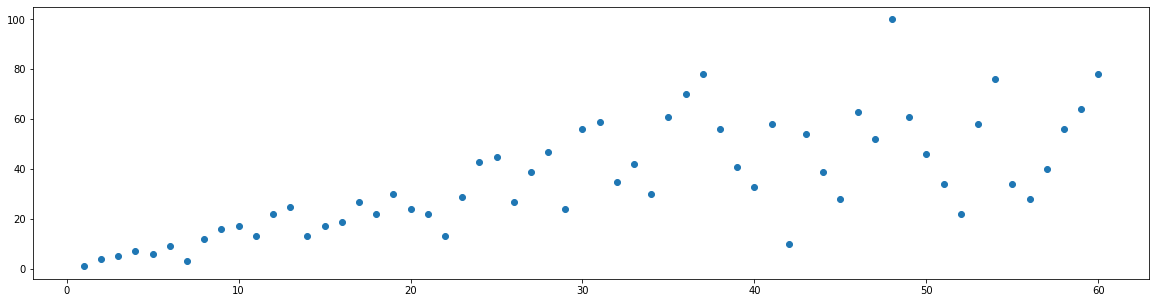

In [6]:
plt.figure(figsize=(20,5))
axes = plt.axes()
plt.scatter(X,Y) 
plt.show()

Lors d'une régression linéaire, on va trouver une droite qui a pour équation une fonction affine de la forme y=ax+b avec a la pente et b l'ordonnée a l'origine. 
[Rappel pour ceux qui ont dormis pendant les cours de Maths](https://fr.wikipedia.org/wiki/Fonction_affine)

Le x de notre fonction correspondra a la valeur qu'on a sur l'axe des abscisses

## Création de la droite d'équation <a id="section_1_2"></a>

In [7]:
from scipy import stats
pente, ordonnee_origine, r_value, p_value, std_err = stats.linregress(X, Y)
#print(stats.linregress(X, Y))
print("l'équation de droite est une fonction affine de la forme y = ax+b avec a =", pente, ", et y =", ordonnee_origine)


l'équation de droite est une fonction affine de la forme y = ax+b avec a = 0.9197277021394831 , et y = 7.664971751412434


On crée ici une fonction qui va tracé la droite d'équation y = 0.9197277021394831x + 7.664971751412434

In [8]:
def equationline(x):
    return pente * x + ordonnee_origine

On trace la droite d'équation y = 0.9197277021394831x + 7.664971751412434

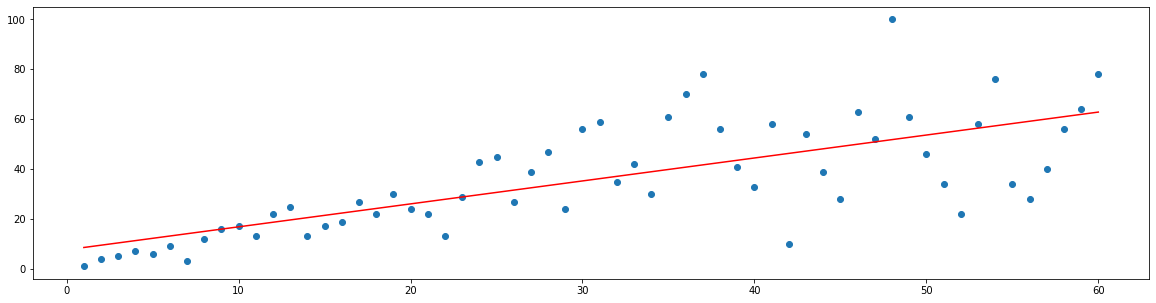

In [9]:
plt.figure(figsize=(20,5))
fitLine = equationline(X)
plt.scatter(X,Y) 
plt.plot(X, fitLine, c='r')

En remplacant maintenant le x pour la valeur d'un mois en abscisse on pourra avoir une idée du nombres d'ordinateurs vendus, il s'agit déjà de faire de la prédiction de ventes, peu précise certes, mais de la prédiction quand même ! 

La fonction ci dessous retourne une estimation du nombre d'ordinateur vendus en fonction du mois de l'entreprise

## Prédiction <a id="section_1_3"></a>

In [10]:
def prediction (x):
    predicted_value = pente * x + ordonnee_origine
    return predicted_value

In [11]:
prediction(120)

118.03229600815041

In [12]:
prediction(1200)

1111.338214318792

In [13]:
def prediction_vs_reality (x):
    predicted_value = prediction (x)
    real_value = df['Computers_number'][x]
    return predicted_value, real_value

La fonction ci dessus permet simplement de comparé la données prédite avec celle dans notre jeu de données 

**/!\ Attention notre jeu de données ne contient que 50 mois de données si vous executez le code :**
```python
prediction_vs_reality(100) 
``` 
**Vous aurez une erreur car la limite de notre jeu de données est 49 /!\**

In [14]:
prediction_vs_reality(0)

(7.664971751412434, 1)

In [15]:
prediction_vs_reality(22)

(27.89898119848106, 29)

# Régression linéaire multiple <a id="chapter2"></a>

In [16]:
df = pd.read_excel("Dataset/Data_computer_sells_multivariate.xlsx")
df2 = df.drop(["Mois"], axis=1)

In [17]:
df2.head()

,Computers_number,Add_expense,Production_expense,Shop_number,mean_computer_buy,mean_weather,Population
0,1,10000,2000.000000,1,555685,16,64301000
1,4,12000,1998.000000,1,277262,-9,64307000
2,5,14000,1996.002000,1,191684,-6,64307000
3,7,12000,1994.005998,1,700569,1,64314000
4,6,11000,1992.011992,1,959654,14,64326000


Ici on a un extrait de données beaucoup plus dense, avec 7 colonnes : 
* Le nombre de PC vendu par l'entreprise par mois
* Le prix dépensé en pub pour l'entreprise par mois (en €)
* Le coût de production d'un PC pour l'entreprise
* Le nombre de magasin présent en France
* Le nombre moyen d'ordinateur acheté en France
* La moyenne des température en France sur le mois 
* Population Française sur le mois


## Données <a id="section_2_1"></a>

On essaye de regarder nos données graphiquement, pour observer comme nous l'avions fait dans les étapes précédente

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('Month')
plt.plot(df['Computers_number'],label="Nombre de PC vendus")
plt.plot(df['Add_expense'],label="Coûts des publicités")
#plt.plot(df['Production_expense'],label="Coûts de production des PC")
#plt.plot(df['Shop_number'],label="Nombres de Boutiques")
#plt.plot(df['mean_computer_buy'],label="Nombre de PC moyen vendus dans le monde")
#plt.plot(df['mean_weather'],label="Moyenne de la météo sur le mois en °C")
plt.plot(df['Population'],label="Population en France sur le mois")
plt.legend()

Comme vous on peut le constater sur le graphique, on ne voit rien ! Cela est dû au faites que **les données ne sont pas du même ordre de grandeur** ! 

En effet le nombre de PC est un nombre compris entre 1 et 100 alors que la population Française est se chiffre en millions.
Voici une méthode pour remédier a ce problème

## Data preprocessing, la normalisation min-max <a id="section_2_2"></a>

La normalisation min-max est l'une des méthodes les plus courantes pour normaliser des données. Pour chaque caractéristique, la valeur minimale de cette caractéristique est transformée en un 0, la valeur maximale est transformée en un 1, et toutes les autres valeurs sont transformées en une décimale entre 0 et 1.

![alt text](norm.png "Title")

In [ ]:
std_scaler = MinMaxScaler().fit(df[["Computers_number","Add_expense","Production_expense","Shop_number","mean_computer_buy","mean_weather","Population"]])

In [ ]:
df_std = std_scaler.transform(df[["Computers_number","Add_expense","Production_expense","Shop_number","mean_computer_buy","mean_weather","Population"]])

In [ ]:
dataset = pd.DataFrame({'Computers_number': df_std[:, 0], 'Add_expense': df_std[:, 1],'Production_expense': df_std[:, 2],'Shop_number': df_std[:, 3],
                         'mean_computer_buy': df_std[:, 4],'mean_weather': df_std[:, 5],'Population': df_std[:, 6]})

On affiche a nouveau les même données que precedemment mais normalisé 

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('Month')
plt.plot(dataset['Computers_number'],label="Nombre de PC vendus")
plt.plot(dataset['Add_expense'],label="Coûts des publicités")
#plt.plot(dataset['Production_expense'],label="Coûts de production des PC")
#plt.plot(dataset['Shop_number'],label="Nombres de Boutiques")
#plt.plot(dataset['mean_computer_buy'],label="Nombre de PC moyen vendus dans le monde")
#plt.plot(dataset['mean_weather'],label="Moyenne de la météo sur le mois en °C")
plt.plot(dataset['Population'],label="Population en France sur le mois")
plt.legend()

On remarque rien que graphiquement des similitudes dans les données. 

Cependant une simple suspicion n'est pas suffisante, il va falloir en avoir le coeur net ! 

## Matrice de corrélation <a id="section_2_3"></a>

Pour rappel :   
La corrélation entre 2 variables est exprimé par un nombre compris en -1 inclus et 1 inclus.   
Si le nombre est proche de 1, les variables sont corrélées positivement entre elles.  
Au contraire si le nombre est proche de -1, les variables sont corrélées négativement entre elles.  
Si le nombre est proche de 0, les variables ne sont pas corrélées.  

Le fait que deux variables soient fortement corrélées ne démontre pas qu'il y ait une relation de causalité entre l'une et l'autre. Le contre-exemple le plus typique est celui où elles sont en fait liées par une causalité commune.

Nous utilisons ici la corrélation de Pearson pour etudier la corrélation linéaire entre nos variables

In [ ]:
matrice_corr = df2.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

On remarque que 4 variables sont très corrélé a notre variable Computers_number qu'on veut essayer de prédire: Add_expense, Production_expense, Shop_number et Population.  
Nous avons donc 4 variables que nous pouvons utilisé pour prédire notre nombre de vente.

Il est l'heure d'entrainer notre modèle !

## Entrainer un modèle <a id="section_2_4"></a>

![alt text](image.png "Title")

Pour l'entrainement d'un modèle en Machine Learning et Deep Learning, en général il faut constituer 2 jeux de données distincts, le jeu de données qui va permettre a notre modèle de s'entraîner, il est généralement plus gros et permet au modèle de s'entraîner sur la données. Il y a dans un second temps le dataset de validation, qui lui va servir a confirmer que notre modèle a bien appris des concepts et n'a pas calqué nos données d'netrainement et cela permet d'éviter [l'overfitting (surrapprentissage)](https://fr.wikipedia.org/wiki/Surapprentissage#:~:text=En%20statistique%2C%20le%20surapprentissage%2C%20ou,d'un%20ensemble%20de%20donn%C3%A9es.)

## Modèle prédictif saisonnier <a id="section_2_5"></a>

In [ ]:
X=pd.DataFrame(np.c_[df2['Add_expense'],
                     df2['Production_expense'],
                     df2['Shop_number'],
                     #df2['Population']
                    ],
               
                     columns = ['Add_expense',
                                'Production_expense',
                                'Shop_number',
                                #'Population'
                                 ])

In [ ]:
Y=df2.Computers_number

In [ ]:
X_train = pd.DataFrame({'Add_expense': df2['Add_expense'][0:45], 
                        'Production_expense': df2['Production_expense'][0:45],
                        'Shop_number': df2['Shop_number'][0:45],
                        #'Population': df2['Population'][0:45]
                       })


X_test =  pd.DataFrame({'Add_expense': df2['Add_expense'][45:60], 
                        'Production_expense': df2['Production_expense'][45:60],
                        'Shop_number': df2['Shop_number'][45:60],
                        #'Population': df2['Population'][45:60]
                       })
#on affiche la shape de nos deux dataset
print(X_train.shape)
print(X_test.shape)

In [ ]:
Y_train = Y[0:45]
Y_test = Y[45:60]
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#chargement du modèle 
lmodellineaire = LinearRegression()
#on lui donne les données d'entrainement 
lmodellineaire.fit(X_train, Y_train)

Pour vérifier la fiabilité de notre modèle, nous allons utiliser 2 moyen d'evaluation, la RMSE et le score R2 sur les données d'apprentissages et sur les données de test. 

En statistique, le coefficient de détermination linéaire de Pearson, noté R2 ou r2, est une mesure de la qualité de la prédiction d'une régression linéaire.

La racine de l'erreur quadratique moyenne (en anglais, root mean square error, RMSE) est une mesure fréquemment utilisée des différences entre les valeurs (valeurs d'échantillon ou de population) prédites par un modèle ou estimateur et les valeurs observées (ou vraies valeurs). Il s'agit simplement de la moyenne des écarts entre données données réelles et données prédites.

In [ ]:
from sklearn.metrics import r2_score

y_train_predict = lmodellineaire.predict(X_train)
#la Rmse est la racine carré de la Mean square error (MSE), permet de savoir en moyenne l'erreur de prediction par rapport aux 
#données réelle
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#Coefficient de determination linéaire de pearson 
r2 = r2_score(Y_train, y_train_predict)

#affichage des metrics pour l'entrainement 
print("La performance du modèle sur la base d'apprentissage")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

#affichage des metrics sur la validation
print('La performance du modèle sur la base de test')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

In [ ]:
predict=[]
real=[]

In [ ]:
#permet de stockées les valeur réelle et les valeur predite sur l'entrainement 
for i in range (0,Y_train.shape[0]):
    predict.append(y_train_predict[i])
    real.append(Y_train.values[i])

In [ ]:
#permet de stockées les valeur réelle et les valeur predite sur la validation 
for i in range (0,Y_test.shape[0]):
    predict.append(y_test_predict[i])
    real.append(Y_test.values[i])

Graphique réprésentant les données Réelles et les données Prédites

In [ ]:
#affiche graphiquement en bleu les valeurs réelle et en orange les valeurs prédite
plt.figure(figsize=(20,5))
plt.plot(real, label='Real')
plt.plot(predict, label='Predict')
plt.legend()

## Modèle prédictif non saisonnier <a id="section_2_6"></a>

Même méthode sauf qu'ici notre dataset de test va etre constituer avec des valeurs aléatoires de notre dataset de base

In [ ]:
from sklearn.model_selection import train_test_split
#Ici on ne veut pas se baser sur la saisonnalité on va donc constituer nos datasets d'entrainement et de validation aléatoirement 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#chargement du modèle 
lmodellineaire = LinearRegression()
#on lui donne les données d'entrainement 
lmodellineaire.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import r2_score

#On lance l'entrainement de notre modèle
y_train_predict = lmodellineaire.predict(X_train)

#la Rmse est la racine carré de la Mean square error (MSE), permet de savoir en moyenne l'erreur de prediction par rapport aux 
#données réelle
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

#Coefficient de determination linéaire de pearson 
r2 = r2_score(Y_train, y_train_predict)

#affichage des metrics pour l'entrainement 
print("La performance du modèle sur la base d'apprentissage")
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
y_test_predict = lmodellineaire.predict(X_test)

#affichage des metrics sur la validation
print('La performance du modèle sur la base de test')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))

In [ ]:
predict=[]
real=[]

In [ ]:
#permet de stockées les valeur réelle et les valeur predite sur l'entrainement 
for i in range (0,Y_train.shape[0]):
    predict.append(y_train_predict[i])
    real.append(Y_train.values[i])

In [ ]:
#permet de stockées les valeur réelle et les valeur predite sur la validation 
for i in range (0,Y_test.shape[0]):
    predict.append(y_test_predict[i])
    real.append(Y_test.values[i])

In [ ]:
#affiche graphiquement en bleu les valeurs réelle et en orange les valeurs prédite
plt.figure(figsize=(20,5))
plt.plot(real, label='Real')
plt.plot(predict, label='Predict')
plt.legend()

## Prédiction du nombre de PC vendus <a id="section_2_7"></a>

Une fois qu'on a choisit notre modèle, nous allons maintenant pouvoir prédire le nombre de PC vendus en fonction de nos variables choisit au début pour rappel :    
Add_expense, Production_expense, Shop_number et Population.

In [ ]:
Add_expense = 68000
Production_expense = 1885
Shop_number = 15

In [ ]:
lmodellineaire.predict([[Add_expense, Production_expense, Shop_number]])

On obtient un résultat d'environ 72 vs 78 dans notre jeu de données donc on a un résultats pas totatelement absurde avec une marge d'erreur de 10% environ, mais on peut du coup faire des prédictions maintenant avec des valeurs que nous n'avons jamais eut par exemple :  

On simule l'augmentation de l'add expense de 20K € et le nombre de shop de 15 a 17 et on diminue le cout de prod de 100 €

In [ ]:
Add_expense = 88000
Production_expense = 1835
Shop_number = 17

In [ ]:
lmodellineaire.predict([[Add_expense, Production_expense, Shop_number]])

on observe qu'avec ces modifications, le modèles estime qu'on devrait pouvoir arrivé a un résultats d'environ 120 PCs vendus sur le mois.

## Modèles plus performant :